In [1]:
# Import numpy, pandas, matplotlib and seaborn for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv("/Users/olufunbi/Desktop/Software/Proheart/heart.csv")

In [25]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [26]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [27]:
df["age"].mean()

54.366336633663366

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<Figure size 1440x1080 with 0 Axes>

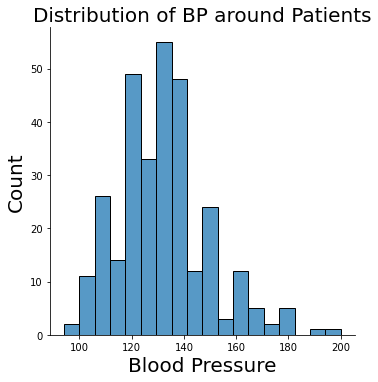

In [28]:
plt.figure(figsize=(20,15))
sns.displot(df["trtbps"])
plt.title("Distribution of BP around Patients", fontsize=20)
plt.xlabel("Blood Pressure", fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

In [75]:
x=df.iloc[:, 1:-1].values 
y=df.iloc[:, -1].values
# x,y

In [76]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [77]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [78]:
# x_train, x_test
# x_test
X_TEST = pd.DataFrame(x_test)
X_TEST

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.621582,-1.010061,0.738068,-1.572318,-0.416025,0.891133,-1.097075,1.545603,1.627483,-2.262328,-0.745049,1.064362
1,0.621582,2.122840,2.046851,-0.386846,-0.416025,-1.122167,0.278026,-0.646997,-0.340336,-0.599653,-0.745049,1.064362
2,0.621582,2.122840,2.046851,0.977565,-0.416025,-1.122167,0.461373,-0.646997,-0.733900,-0.599653,-0.745049,1.064362
3,0.621582,-1.010061,-0.308959,0.306543,-0.416025,-1.122167,-0.363688,1.545603,1.824265,-0.599653,0.264906,1.064362
4,0.621582,1.078539,-0.047202,-0.297376,-0.416025,0.891133,-0.134504,-0.646997,0.840355,-0.599653,2.284818,1.064362
...,...,...,...,...,...,...,...,...,...,...,...,...
56,-1.608799,1.078539,-0.675418,-0.051335,-0.416025,0.891133,0.003006,-0.646997,-0.635509,-0.599653,0.264906,-0.739140
57,-1.608799,0.034239,-0.047202,-0.185539,-0.416025,-1.122167,1.148923,-0.646997,-0.930681,-0.599653,0.264906,-0.739140
58,0.621582,1.078539,0.999824,-0.722357,2.403701,0.891133,0.369699,-0.646997,0.643574,1.063022,-0.745049,-0.739140
59,-1.608799,0.034239,-0.570715,-0.006600,-0.416025,0.891133,0.598883,-0.646997,0.151619,1.063022,-0.745049,-0.739140


In [79]:
# We chose to use the Support Vector Machine model.
model= SVC(probability=True)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
print("The Accuracy of SVM is: ", accuracy_score(y_test, predicted)*100)

The Accuracy of SVM is:  86.88524590163934


In [73]:
def predict():
    age = input("Please enter your age: ")
    sex = input("Please enter your gender: ")
    cp = input("Please enter your chest pain type: ")
    trtbps = input("Please enter your resting blood pressure: ")
    chol = input("Please enter your cholestorol level: ")
    fbs = input("Please enter your fasting blood pressure: ")
    restecg = input("Please enter your resting electrocardiographic results: ")
    thalachh = input("Please enter your maximum heart rate achieved: ")
    exng = input("Do you have exercised induce angina: ")
    oldpeak = input("Please enter your old peak: ")
    thall = input("Please enter your Thalium Stress Test result: ")
    output = 1
    data_set = [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, thall, output]
    
    converted_data = np.array(data_set).reshape(1,-1)
    risk_percentage = model.predict_proba(yk)[0][1] * 100
    risk = f'{risk_percentage:.1f}'
    
    return("You have a "+ str(risk) + "% chance of getting a heart failure")
predict()

Please enter your age: 78
Please enter your gender: 1
Please enter your chest pain type: 2
Please enter your resting blood pressure: 90
Please enter your cholestorol level: 2
Please enter your fasting blood pressure: 1
Please enter your resting electrocardiographic results: 1
Please enter your maximum heart rate achieved: 78
Do you have exercised induce angina: 1
Please enter your old peak: 3.4
Please enter your Thalium Stress Test result: 2


'You have a 44.0% chance of getting a heart failure'